<a href="https://colab.research.google.com/github/vincm1/RecSys_Implicit/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import zipfile
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df_zip = zipfile.ZipFile('/content/drive/MyDrive/RecSys/Orders_Nov22_Jun23.zip')
df = pd.read_csv(df_zip.open('Bericht 1.csv'), delimiter=";")

Exception ignored in: <function ZipFile.__del__ at 0x7e4191e35090>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1819, in __del__
  File "/usr/lib/python3.10/zipfile.py", line 1841, in close
  File "/usr/lib/python3.10/zipfile.py", line 1941, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
<ipython-input-39-6f4658781373>:2: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_zip.open('Bericht 1.csv'), delimiter=";")


In [40]:
len(df)

2220299

In [41]:
# dropping all retours indicated by negative sales
df_2 = df[df["Qty Shipped"] >= 0]

In [42]:
# dropping customer name due to privacy reasons
df_2 = df_2[['Order Nbr', 'Entry Date', 'Entry DateTime', 'FiscalMonth',
       'BranchCustomerNbr', 'BusinessUnitLevel2', 'KDGroup',
       'Sku', 'Product Descr1', 'Product Descr2', 'ProductGroup',
       'ProductGroupMasterDescription', 'ProductGroupDescription',
       'ProductGroup2ndDescription', 'Sales', 'Qty Shipped']]

In [43]:
len(df_2)

2142816

In [44]:
len(df_2["Order Nbr"].unique())

371053

In [45]:
 duplicate_orders = df_2.groupby("Order Nbr")["BranchCustomerNbr"].nunique().sort_values(ascending=False)

In [46]:
duplicate_orders

Order Nbr
4414565    11
4424086    11
4424176    11
4422295    11
4425351    11
           ..
44D3G91     1
44D3G92     1
44D3G93     1
44D3G94     1
44Z9Z99     1
Name: BranchCustomerNbr, Length: 371053, dtype: int64

In [47]:
df_2["Order_BCN"] = df_2["Order Nbr"].astype(str) + "_" + df_2["BranchCustomerNbr"].astype(str)

In [48]:
df_2.head(5)

,Order Nbr,Entry Date,Entry DateTime,FiscalMonth,BranchCustomerNbr,BusinessUnitLevel2,KDGroup,Sku,Product Descr1,Product Descr2,ProductGroup,ProductGroupMasterDescription,ProductGroupDescription,ProductGroup2ndDescription,Sales,Qty Shipped,Order_BCN
213,1545306,02.11.22,NaN,2022FM11,15885514,Export Channel (DE),,CF55877,DT PRINT ZQ320 KIT LABEL SENSOR,GROUP E INCL SOFT CASE 1-SL CRDL,5805,AIDC/PoS Printers,Mobile Receipt Printer,"Other (incl. AIDC/POS, V7)","10.713,30",41.0,1545306_15885514
458,4422886,03.11.22,NaN,2023FM02,44413224,Business Channel,,CF89211,Z-SELECT 2000D REMOVABLE NS,77X79.5MM 216 L/R Q:1083454A,5812,AIDC/PoS Printers,Label Printers Supplies,"Other (incl. AIDC/POS, V7)","1.393,00",140.0,4422886_44413224
1425,4444882,08.11.22,NaN,2023FM01,44432101,Business Channel,,CF92153,K120G2-R I5-1135G7 12.5IN W/CAM,W10P 16GB/256GB PCIE SSD EU/UK,14,Computer Systems,Tablets (Slate Style),System,"2.413,67",1.0,4444882_44432101
2112,4452692,09.11.22,NaN,2022FM12,44538363,DC-POS,,CC35474,Z-PERF 1000D 80 RECEIPT 101.6MM,24.1 METERS C-19MM BOX OF 16,5812,AIDC/PoS Printers,Label Printers Supplies,"Other (incl. AIDC/POS, V7)","198,25",5.0,4452692_44538363
3786,4475417,14.11.22,NaN,2022FM11,44461895,Business Channel,THUN,CC93503,JABRA EVOLVE2 75 LINK380A MS,STEREO STAND BLACK,1414,Mobility,Bluetooth Headsets,Printers & Peripherals,"196,47",1.0,4475417_44461895


In [49]:
len(df_2.Sku.unique())

76110

In [50]:
len(df_2["Order_BCN"].unique())

817489

In [51]:
len(duplicate_orders[duplicate_orders > 1])

93545

In [52]:
len(df_2["BranchCustomerNbr"].unique())

17634

In [53]:
len(df_2["Sku"].unique())

76110

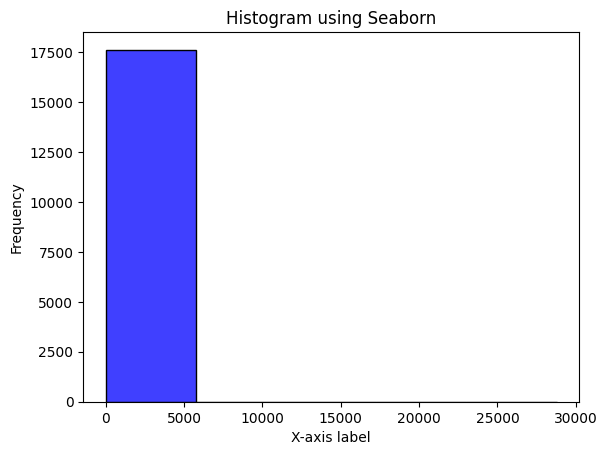

In [54]:
orders_per_user = df_2.groupby("BranchCustomerNbr")["Order_BCN"].nunique()
# Create a histogram using Seaborn
sns.histplot(orders_per_user, bins=5, kde=False, color='blue')

# Set labels and title
plt.xlabel('X-axis label')
plt.ylabel('Frequency')
plt.title('Histogram using Seaborn')

# Show the plot
plt.show()

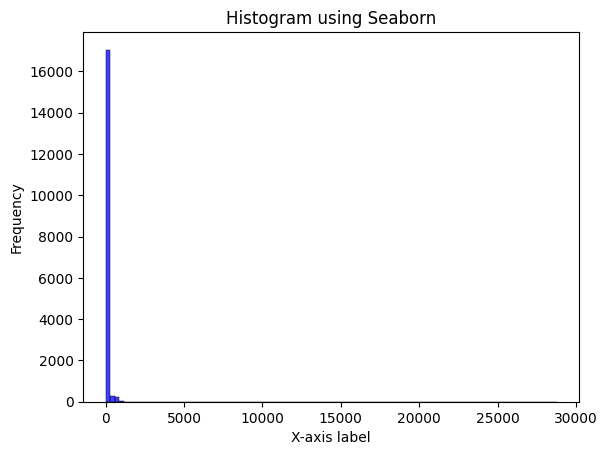

In [55]:
orders_per_user = df_2.groupby("BranchCustomerNbr")["Order_BCN"].nunique()
# Create a histogram using Seaborn
sns.histplot(orders_per_user, bins=100, kde=False, color='blue')

# Set labels and title
plt.xlabel('X-axis label')
plt.ylabel('Frequency')
plt.title('Histogram using Seaborn')

# Show the plot
plt.show()

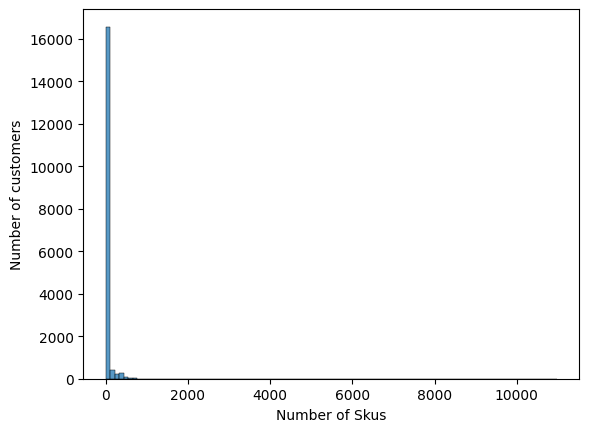

In [90]:
unique_sku_per_customer = df_2.groupby("BranchCustomerNbr")["Sku"].nunique()
unique_sku_per_customer = pd.DataFrame(unique_sku_per_customer)
sns.histplot(data=unique_sku_per_customer, x="Sku", bins=100)
plt.xlabel("Number of Skus")
plt.ylabel("Number of customers")
plt.show()

In [57]:
unique_sku_per_customer.sort_values(by="Sku", ascending=False)

,Sku
BranchCustomerNbr,
44465054,10971
44432101,8714
44453197,6822
44465006,6028
44465057,5087
...,...
44509960,1
44509952,1
44869231,1


In [58]:
len(unique_sku_per_customer)

17634

In [59]:
len(unique_sku_per_customer[unique_sku_per_customer["Sku"] <= 2])

6184

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

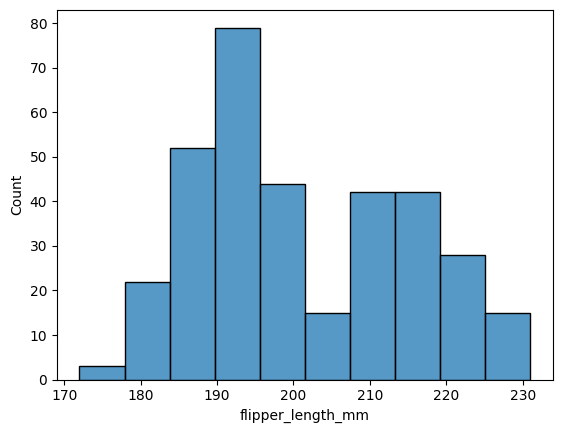

In [60]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

In [61]:
# Orders per month
df_2["Order_BCN"].nunique() / df_2["BranchCustomerNbr"].nunique() /df_2["FiscalMonth"].nunique()

5.7948352614267895

In [62]:
df_2["Sku"].count() / df_2["Order_BCN"].nunique()

2.621216921573257

In [63]:
df_2.groupby("Product Descr1")["Sku"].count().sort_values(ascending=False)

Product Descr1
AMAZON ECHO DOT BLACK             36296
ULTRA 64 GB USB FLASH DRIVE       24787
SANDISK ULTRA FIT                 22721
SANDISK ULTRA DUAL DRIVE GO-C     20409
FIRE TV STICK LITE WITH           18224
                                  ...  
KIT BOLT DOWN 18 INCH R               1
KIT BEZEL FRONT STANDARD              1
KIT AFTER SERVICE                     1
KIT ACC BATT ELIMINATOR CRADLE        1
ZZGL.BATT PACK F/XANTO 10.000         1
Name: Sku, Length: 50076, dtype: int64

In [64]:
df_2["purchase_freq"] = 1

In [65]:
df_2.groupby("BranchCustomerNbr")["Sku"].nunique()

BranchCustomerNbr
15413453    6
15428528    3
15430644    7
15433079    1
15445570    2
           ..
44S201B2    2
44S304B2    3
44S309B2    3
44S312B2    1
44S324B2    2
Name: Sku, Length: 17634, dtype: int64

In [66]:
df_rec = pd.DataFrame(df_2.groupby(["BranchCustomerNbr","Sku"])["purchase_freq"].sum())
df_rec

purchase_freq
BranchCustomerNbr Sku                   
15413453          1413616              1
                  CC97711              1
                  CE52895              1
                  CE52897              1
                  CE52907              1
...                                  ...
44S309B2          CE35137              1
                  CE77433              1
44S312B2          CE91064              1
44S324B2          CD07182              1
                  CF37713              1

[605952 rows x 1 columns]

In [67]:
len(df_rec)

605952

In [68]:
df_2[["BranchCustomerNbr","Sku","Qty Shipped"]].head()

,BranchCustomerNbr,Sku,Qty Shipped
213,15885514,CF55877,41.0
458,44413224,CF89211,140.0
1425,44432101,CF92153,1.0
2112,44538363,CC35474,5.0
3786,44461895,CC93503,1.0


In [81]:
pivot_table = df_2[:10].pivot_table(values='Qty Shipped', index='BranchCustomerNbr', columns='Sku', aggfunc='sum')


In [82]:
pivot_table.fillna(0)

Sku,2M21KWZ,CC35474,CC93503,CE30547,CE86207,CE91069,CF55877,CF58152,CF89211,CF92153
BranchCustomerNbr,,,,,,,,,,
15885514,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0
44413224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0
44429890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44431805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44432101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44461895,0.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0
44470800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44538363,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
num_users = len(df_2.BranchCustomerNbr.unique())
num_items = len(df_2.Sku.unique())
num_orders_sku = len(df_2.Order_BCN.unique())
combos = num_users * num_items

In [75]:
num_orders_sku

817489

In [83]:
sparsity = (1 - (num_orders_sku / combos))
sparsity * 100

99.93908989345498

In [87]:
combos

1342123740